In [37]:
# importing libraries
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
# reading data from the file
df=pd.read_csv("data (1).csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
# return all the columns with null values count
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [41]:
# return the size of dataset
df.shape

(569, 33)

In [42]:
# remove the column
df=df.dropna(axis=1)

In [43]:
# shape of dataset after removing the null column
df.shape

(569, 32)

In [44]:
# describe the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [45]:
# Get the count of malignant<M> and Benign<B> cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


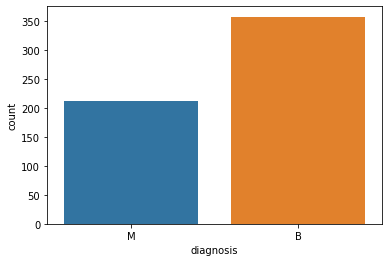

In [46]:
sns.countplot(df['diagnosis'],label="count")

In [47]:
# label encoding(convert the value of M and B into 1 and 0)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [48]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
# split the dataset into dependent(X) and Independent(Y) datasets
X = df.drop("diagnosis",axis=1)   #Feature Matrix
y = df["diagnosis"] 

In [53]:
# spliting the data into trainning and test dateset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)
X_train.shape, X_test.shape

((455, 31), (114, 31))

In [54]:
X_train.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.061322,0.088034,0.060773,0.091251,-0.011703,-0.007814,0.039173,0.036707,0.014810,...,0.083063,0.063098,0.078442,0.116060,0.014529,-0.005306,0.021251,0.025832,-0.040600,-0.005243
radius_mean,0.061322,1.000000,0.316083,0.998185,0.987094,0.164226,0.508985,0.669625,0.823662,0.130193,...,0.969537,0.281647,0.966220,0.941185,0.116935,0.403744,0.511501,0.736397,0.149669,-0.004484
texture_mean,0.088034,0.316083,1.000000,0.322445,0.318626,-0.023107,0.241977,0.298975,0.292473,0.064376,...,0.349677,0.908182,0.354636,0.348051,0.093454,0.273151,0.298302,0.289088,0.098803,0.115940
perimeter_mean,0.060773,0.998185,0.322445,1.000000,0.986692,0.197597,0.555299,0.705993,0.850247,0.161548,...,0.969520,0.288406,0.970507,0.941920,0.145972,0.442236,0.545424,0.762361,0.171204,0.035518
area_mean,0.091251,0.987094,0.318626,0.986692,1.000000,0.170459,0.500276,0.679675,0.823160,0.131129,...,0.961717,0.276386,0.959382,0.958527,0.120212,0.380076,0.498019,0.712975,0.126243,-0.008425
smoothness_mean,-0.011703,0.164226,-0.023107,0.197597,0.170459,1.000000,0.643792,0.503715,0.540170,0.536098,...,0.202340,0.039730,0.222953,0.196480,0.800811,0.454826,0.418035,0.491856,0.374436,0.487641
compactness_mean,-0.007814,0.508985,0.241977,0.555299,0.500276,0.643792,1.000000,0.879782,0.832933,0.583548,...,0.537510,0.257121,0.583536,0.511644,0.577326,0.865480,0.818573,0.825494,0.501795,0.685937
concavity_mean,0.039173,0.669625,0.298975,0.705993,0.679675,0.503715,0.879782,1.000000,0.914627,0.477989,...,0.679315,0.299400,0.713638,0.668894,0.442474,0.735011,0.880653,0.856157,0.387143,0.506538
concave points_mean,0.036707,0.823662,0.292473,0.850247,0.823160,0.540170,0.832933,0.914627,1.000000,0.443281,...,0.829558,0.293345,0.852132,0.808452,0.447236,0.654748,0.739295,0.906312,0.358796,0.354534
symmetry_mean,0.014810,0.130193,0.064376,0.161548,0.131129,0.536098,0.583548,0.477989,0.443281,1.000000,...,0.161466,0.075811,0.188754,0.152443,0.410912,0.454890,0.412594,0.418307,0.688489,0.429271


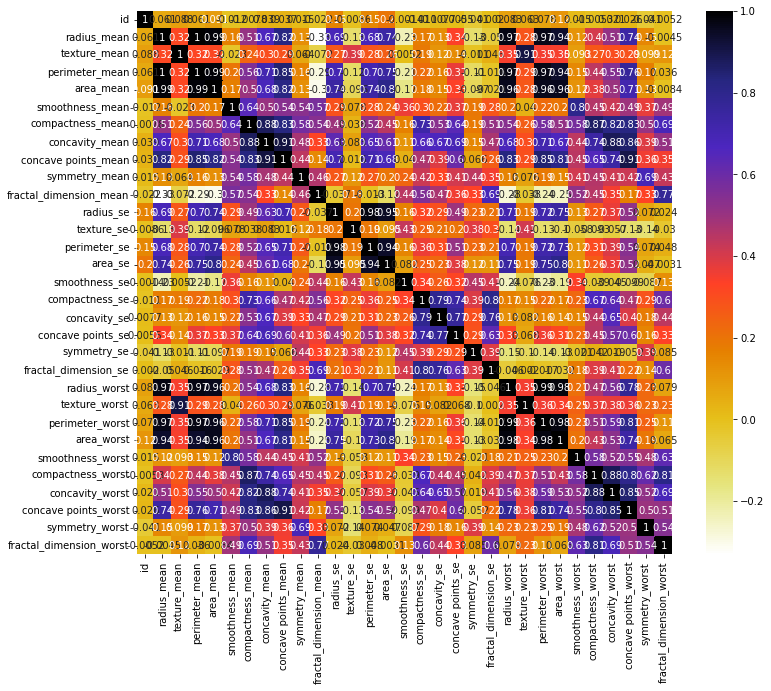

In [56]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [57]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

20

In [59]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_se',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [60]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
512,915691,13.40,20.52,0.11060,0.14690,0.2116,0.07325,0.9306,0.005414,0.01705,0.3585
457,9112367,13.21,25.25,0.08791,0.05205,0.1619,0.05584,1.3500,0.005768,0.01347,0.2444
439,909410,14.02,15.66,0.07966,0.05581,0.1589,0.05586,0.6549,0.004837,0.01171,0.2136
298,892214,14.26,18.17,0.06576,0.05220,0.1635,0.05586,0.6690,0.003169,0.01103,0.2636
37,854941,13.03,18.42,0.08983,0.03766,0.1467,0.05863,2.3420,0.004352,0.02671,0.1987
...,...,...,...,...,...,...,...,...,...,...,...
213,881094802,17.42,25.56,0.10060,0.11460,0.1308,0.05866,1.6670,0.031130,0.02175,0.1603
519,917080,12.75,16.70,0.11250,0.11170,0.2120,0.06623,1.0030,0.007509,0.01805,0.3071
432,908194,20.18,19.54,0.11330,0.14890,0.1724,0.06053,1.0010,0.009087,0.02451,0.3032
516,916799,18.31,20.58,0.10680,0.12480,0.1860,0.05941,0.9225,0.006176,0.01559,0.3074


In [61]:
# feature scaling
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [66]:
# models/ Algorithms

def models(X_train,Y_train):
        #logistic regression
        from sklearn.linear_model import LogisticRegression
        log=LogisticRegression(random_state=0)
        log.fit(X_train,Y_train)
        
        
        #Decision Tree
        from sklearn.tree import DecisionTreeClassifier
        tree=DecisionTreeClassifier(random_state=0,criterion="entropy")
        tree.fit(X_train,Y_train)
        
        #Random Forest
        from sklearn.ensemble import RandomForestClassifier
        forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
        forest.fit(X_train,Y_train)

        #Support vector Classification
        from sklearn.svm import SVC
        clf = SVC(kernel='linear')
        clf.fit(X_train,Y_train)

        #KNN
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
        classifier.fit(X_train,Y_train)

        print('[0]logistic regression accuracy:',log.score(X_train,Y_train))
        print('[1]Decision tree accuracy:',tree.score(X_train,Y_train))
        print('[2]Random forest accuracy:',forest.score(X_train,Y_train))
        print('[3]Support Vector accuracy:',clf.score(X_train,Y_train))
        print('[4]KNN accuracy:',classifier.score(X_train,Y_train))
        
        return log,tree,forest,clf,classifier

In [67]:
model=models(X_train,Y_train)

[0]logistic regression accuracy: 0.989010989010989
[1]Decision tree accuracy: 1.0
[2]Random forest accuracy: 0.9978021978021978
[3]Support Vector accuracy: 0.989010989010989
[4]KNN accuracy: 0.978021978021978


In [68]:
# testing the models/result

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    print("Model",i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print('Accuracy : ',accuracy_score(Y_test,model[i].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy :  0.956140350877193
Model 1
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.91      0.87      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Accuracy :  0.9122807017543859
Model 2
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97

In [69]:
# prediction of random-forest
pred=model[2].predict(X_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(Y_test)

Predicted values:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]
Actual values:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
